In [186]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
from pandas import DataFrame, MultiIndex, concat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import read_excel

from matplotlib import pyplot as plt
import seaborn as sb

# 분산분석을 위한 라이브러리
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 사후분석을 위한 라이브러리
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind

from math import sqrt
from scipy.stats import t
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency

# helper 참조
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import normality_test, equal_variance_test, independence_test, all_test

In [187]:
df = read_excel("https://data.hossam.kr/E02/reading.xlsx")
df

,독서방법,점수
0,B,6
1,B,9
2,B,2
3,B,16
4,D,7
5,D,7
6,D,12
7,D,10
8,D,16
9,S,11


In [188]:
target = []
for i in df['독서방법']:
    if 'B' in i:
        target.append(0)
    elif 'D' in i:
        target.append(1)
    else:
        target.append(3)
print(target)
df['독서방법'] = target

[0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3]


In [189]:
df.columns = ['read', 'grade']
# df

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


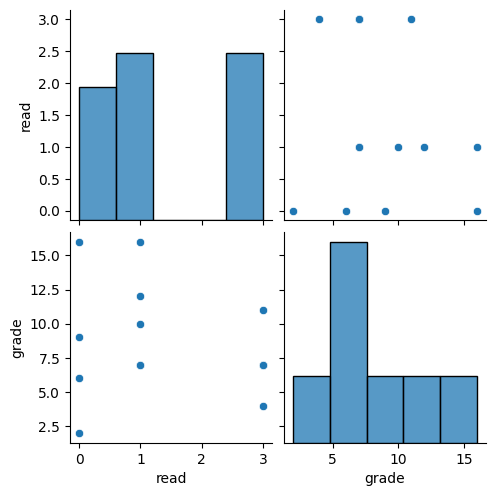

In [190]:
sb.pairplot(df, size=2.5, diag_kind='hist')
plt.show()

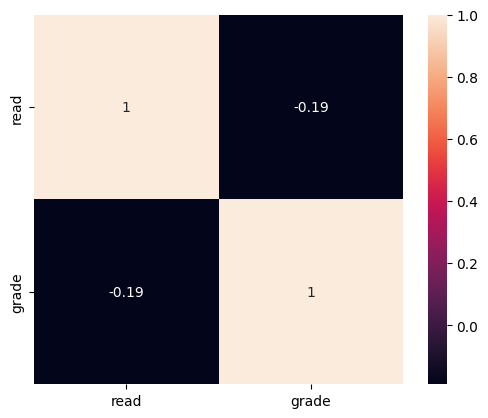

In [191]:
sb.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

In [193]:
# stats.pearsonr(df['read'], df['grade'])

#### 문제 2

In [194]:
df = read_excel("https://data.hossam.kr/E02/tomato.xlsx")
df

,효소함량,모종성장
0,0,10.8
1,0,9.1
2,0,13.5
3,0,9.2
4,1000,11.1
5,1000,11.2
6,1000,8.2
7,1000,11.3
8,5000,5.4
9,5000,4.6


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   효소함량    16 non-null     int64  
 1   모종성장    16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 388.0 bytes


In [196]:
df.columns = ['Enzyme', 'seedling']

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


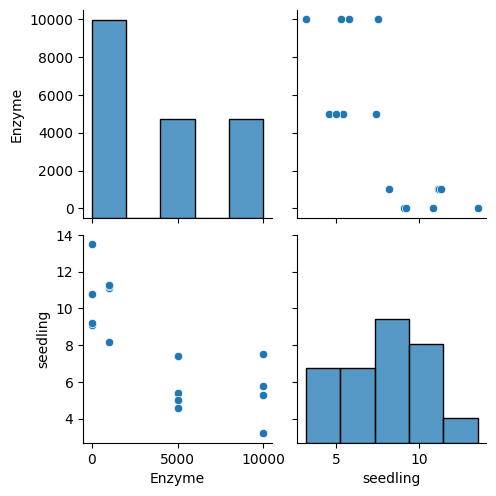

In [197]:
sb.pairplot(df, size=2.5, diag_kind='hist')
plt.show()

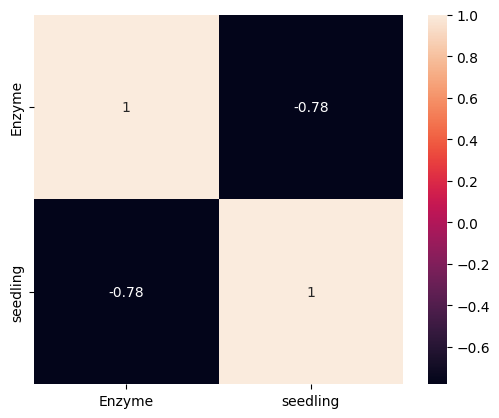

In [198]:
sb.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

### 결론 해석
###### 모종과 효소에는 음의 상관관계가 강하게있다.

#### 문제 3

In [199]:
df = read_excel("https://data.hossam.kr/E02/edu.xlsx")
df

,교육방법,국어,영어
0,1,65,82
1,1,87,79
2,1,73,85
3,1,79,60
4,1,81,65
5,1,69,70
6,1,55,79
7,1,76,80
8,1,77,76
9,1,70,90


In [ ]:
df1 = df.filter(['교육방법', '국어'])
df1.rename(columns={'국어':'점수'}, inplace=True)


In [200]:
df.columns = ['method', 'korean', 'English']
df.head()
# target = []
# for i in df['method']:
#     if 1 == i:
#         target.append(1)
#     else:
#         target.append(None)
# df['target'] = target
# df.isnull().sum()
df1 = df[df['method'].apply(lambda x : x in [1])]
print(df1)
df2 = df[df['method'].apply(lambda x : x in [2])]
print(df2)
df

    method  korean  English
0        1      65       82
1        1      87       79
2        1      73       85
3        1      79       60
4        1      81       65
5        1      69       70
6        1      55       79
7        1      76       80
8        1      77       76
9        1      70       90
10       1      88       68
    method  korean  English
11       2      75       72
12       2      69       75
13       2      83       93
14       2      81       85
15       2      72       60
16       2      79       65
17       2      85       88
18       2      89       92
19       2      90       83
20       2      77       93
21       2      95       78


,method,korean,English
0,1,65,82
1,1,87,79
2,1,73,85
3,1,79,60
4,1,81,65
5,1,69,70
6,1,55,79
7,1,76,80
8,1,77,76
9,1,70,90


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


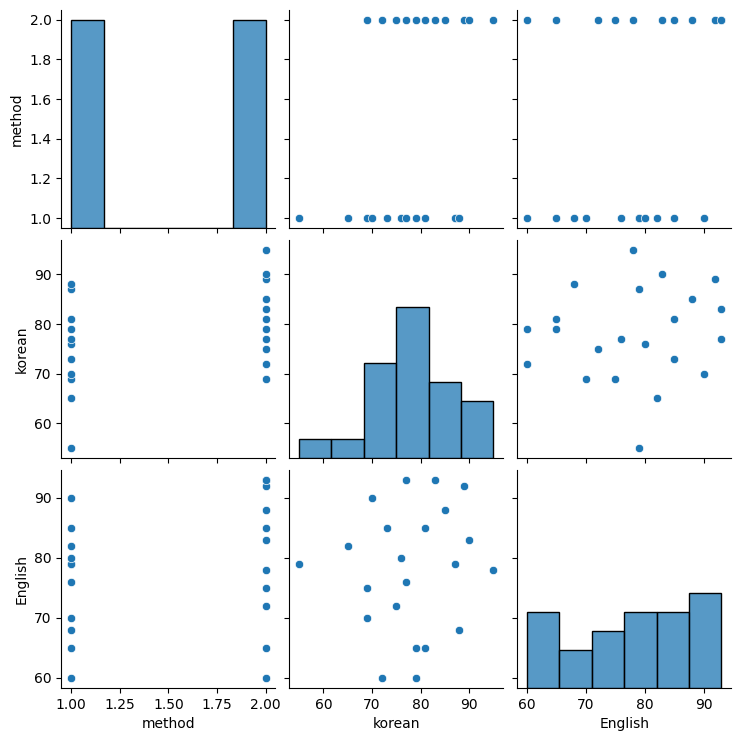

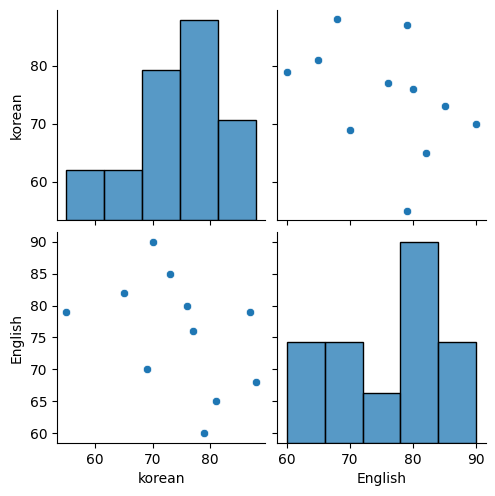

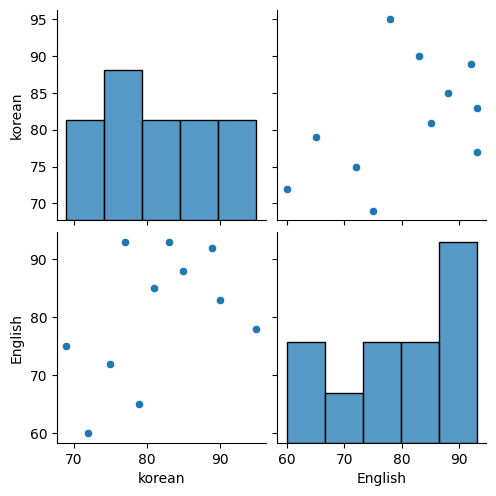

In [201]:
df1 = df1.drop(['method'], axis=1)
df2 = df2.drop(['method'], axis=1)
sb.pairplot(df, size=2.5, diag_kind='hist')
sb.pairplot(df1, size=2.5, diag_kind='hist')
sb.pairplot(df2, size=2.5, diag_kind='hist')
plt.show()

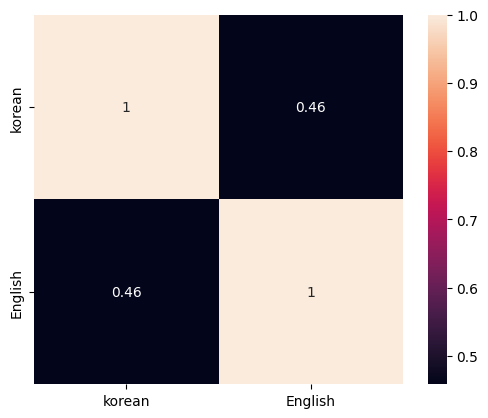

In [202]:
sb.heatmap(data=df2.corr(), square=True, annot=True, cbar=True)
plt.show()

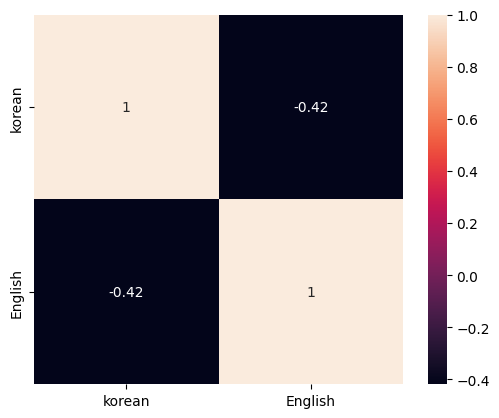

In [203]:
sb.heatmap(data=df1.corr(), square=True, annot=True, cbar=True)
plt.show()

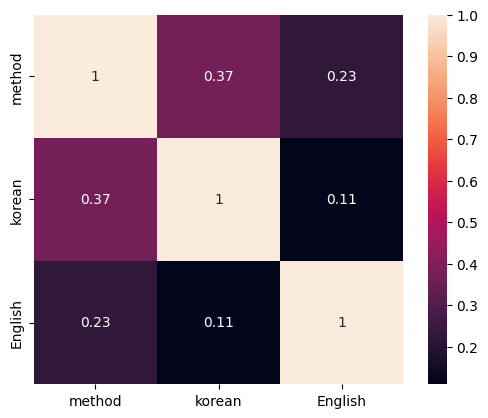

In [204]:
sb.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

#### 결론
##### 공부방법에 따른 국어점수는 약한 양의 관계가 나타나지만
##### 영어 점수와 같은경우 별다른 차이를 보이지 못한다.
###### 각각의 그룹을 나누어보면 교육방법 1의 경우 영어와 국어점수의 약한 양의 상관관계를 보이고
###### 영어의 경우 약한 음의상관관계를 보인다.
###### 한과목이 이미 충분한 학생의 경우 한과목 특화하게 공부를 잘시키고 싶으면 2번 공부방법을 택하는 느낌